In [ ]:
# Importing lIbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount("/content/drive")
import sys
sys.path.append('/content/drive/My Drive/')
import utils
import plot_utils
import nse_utils




Mounted at /content/drive


In [ ]:
# File paths
anto_file = ("/content/drive/MyDrive/Datasets/raw/raw/ANTO2_USGS.txt")
plvo_file = ("/content/drive/MyDrive/Datasets/raw/raw/PLVO2_USGS.txt")
anto_file_sim = ("/content/drive/MyDrive/Datasets/raw/raw/ANTO2_sim.txt")
plvo_file_sim = ("/content/drive/MyDrive/Datasets/raw/raw/PLVO2_sim.txt")

In [ ]:
# Read and preprocess the USGS data
df_anto = utils.read_usgs_data(anto_file, header_line=33)
df_plvo = utils.read_usgs_data(plvo_file, header_line=32)

# Read and preprocess simulation data
df_anto_sim = utils.read_simulation_data(anto_file_sim, header_line=6)
df_plvo_sim = utils.read_simulation_data(plvo_file_sim, header_line=6)


In [ ]:
df_anto.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality
212524,USGS,7336200,2007-01-01 00:00:00+00:00,CST,18400.0,A:[91]
212525,USGS,7336200,2007-01-01 01:00:00+00:00,CST,17600.0,A:[91]
212526,USGS,7336200,2007-01-01 02:00:00+00:00,CST,16800.0,A:[91]
212527,USGS,7336200,2007-01-01 03:00:00+00:00,CST,16000.0,A:[91]
212528,USGS,7336200,2007-01-01 04:00:00+00:00,CST,15200.0,A:[91]


In [ ]:
df_plvo.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality
134473,USGS,7328500,2007-01-01 00:00:00+00:00,CST,355.0,A:[91]
134474,USGS,7328500,2007-01-01 01:00:00+00:00,CST,355.0,A:[91]
134475,USGS,7328500,2007-01-01 02:00:00+00:00,CST,355.0,A:[91]
134476,USGS,7328500,2007-01-01 03:00:00+00:00,CST,355.0,A:[91]
134477,USGS,7328500,2007-01-01 04:00:00+00:00,CST,355.0,A:[91]


In [ ]:
df_anto_sim.head()

,datetime,Sim_Discharge
78314,2007-01-01 00:00:00-06:00,8404
78315,2007-01-01 06:00:00-06:00,7821
78316,2007-01-01 12:00:00-06:00,7006
78317,2007-01-01 18:00:00-06:00,6090
78318,2007-01-02 00:00:00-06:00,5257


In [ ]:
df_plvo_sim.head()

,datetime,Sim_Discharge
78314,2007-01-01 00:00:00-06:00,504
78315,2007-01-01 06:00:00-06:00,556
78316,2007-01-01 12:00:00-06:00,561
78317,2007-01-01 18:00:00-06:00,514
78318,2007-01-02 00:00:00-06:00,450


In [ ]:
# Merge df_anto and df_anto_sim
df_anto_merged = pd.merge(df_anto, df_anto_sim, on='datetime', how='inner')

# Merge df_plvo and df_plvo_sim
df_plvo_merged = pd.merge(df_plvo, df_plvo_sim, on='datetime', how='inner')


In [ ]:
# Replace "CST" with "UTC" in the 'timezone' column
df_anto_merged['timezone'] = df_anto_merged['timezone'].replace('CST', 'UTC')
df_plvo_merged['timezone'] = df_plvo_merged['timezone'].replace('CST', 'UTC')

# Display the modified DataFrame
print(df_anto_merged.head())


    org  site_num                  datetime timezone  USGS_Discharge quality  \
0  USGS   7336200 2007-01-01 06:00:00+00:00      UTC         13900.0  A:[91]   
1  USGS   7336200 2007-01-01 12:00:00+00:00      UTC         10100.0  A:[91]   
2  USGS   7336200 2007-01-01 18:00:00+00:00      UTC          6870.0  A:[91]   
3  USGS   7336200 2007-01-02 00:00:00+00:00      UTC          5080.0  A:[91]   
4  USGS   7336200 2007-01-02 06:00:00+00:00      UTC          4180.0  A:[91]   

   Sim_Discharge  
0           8404  
1           7821  
2           7006  
3           6090  
4           5257  


In [ ]:
# Check for missing values in df_anto_merged
missing_values_anto = df_anto_merged.isnull().sum()

# Check for missing values in df_plvo_merged
missing_values_plvo = df_plvo_merged.isnull().sum()

# Print the number of missing values for each station
print("Number of missing values in df_anto_merged:")
print(missing_values_anto)

print("\nNumber of missing values in df_plvo_merged:")
print(missing_values_plvo)


Number of missing values in df_anto_merged:
org               0
site_num          0
datetime          0
timezone          0
USGS_Discharge    0
quality           0
Sim_Discharge     0
dtype: int64

Number of missing values in df_plvo_merged:
org               0
site_num          0
datetime          0
timezone          0
USGS_Discharge    0
quality           0
Sim_Discharge     0
dtype: int64


In [ ]:
df_anto_merged.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
0,USGS,7336200,2007-01-01 06:00:00+00:00,UTC,13900.0,A:[91],8404
1,USGS,7336200,2007-01-01 12:00:00+00:00,UTC,10100.0,A:[91],7821
2,USGS,7336200,2007-01-01 18:00:00+00:00,UTC,6870.0,A:[91],7006
3,USGS,7336200,2007-01-02 00:00:00+00:00,UTC,5080.0,A:[91],6090
4,USGS,7336200,2007-01-02 06:00:00+00:00,UTC,4180.0,A:[91],5257


In [ ]:
df_plvo_merged.tail()

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
17402,USGS,7328500,2020-12-30 18:00:00+00:00,UTC,451.0,A:e,294
17403,USGS,7328500,2020-12-31 00:00:00+00:00,UTC,638.0,A:e,728
17404,USGS,7328500,2020-12-31 06:00:00+00:00,UTC,761.0,A:e,1175
17405,USGS,7328500,2020-12-31 12:00:00+00:00,UTC,959.0,A:e,1374
17406,USGS,7328500,2020-12-31 18:00:00+00:00,UTC,1220.0,A:e,1333


In [ ]:
# Convert 'datetime' column to datetime-like object
df_plvo_merged['datetime'] = pd.to_datetime(df_plvo_merged['datetime'])

# Filter the DataFrame for datetime values on "2007-01-01"
filtered_df = df_plvo_merged[df_plvo_merged['datetime'].dt.date == pd.to_datetime("2007-01-01")]

# Display the filtered DataFrame
print(filtered_df)


Empty DataFrame
Columns: [org, site_num, datetime, timezone, USGS_Discharge, quality, Sim_Discharge]
Index: []


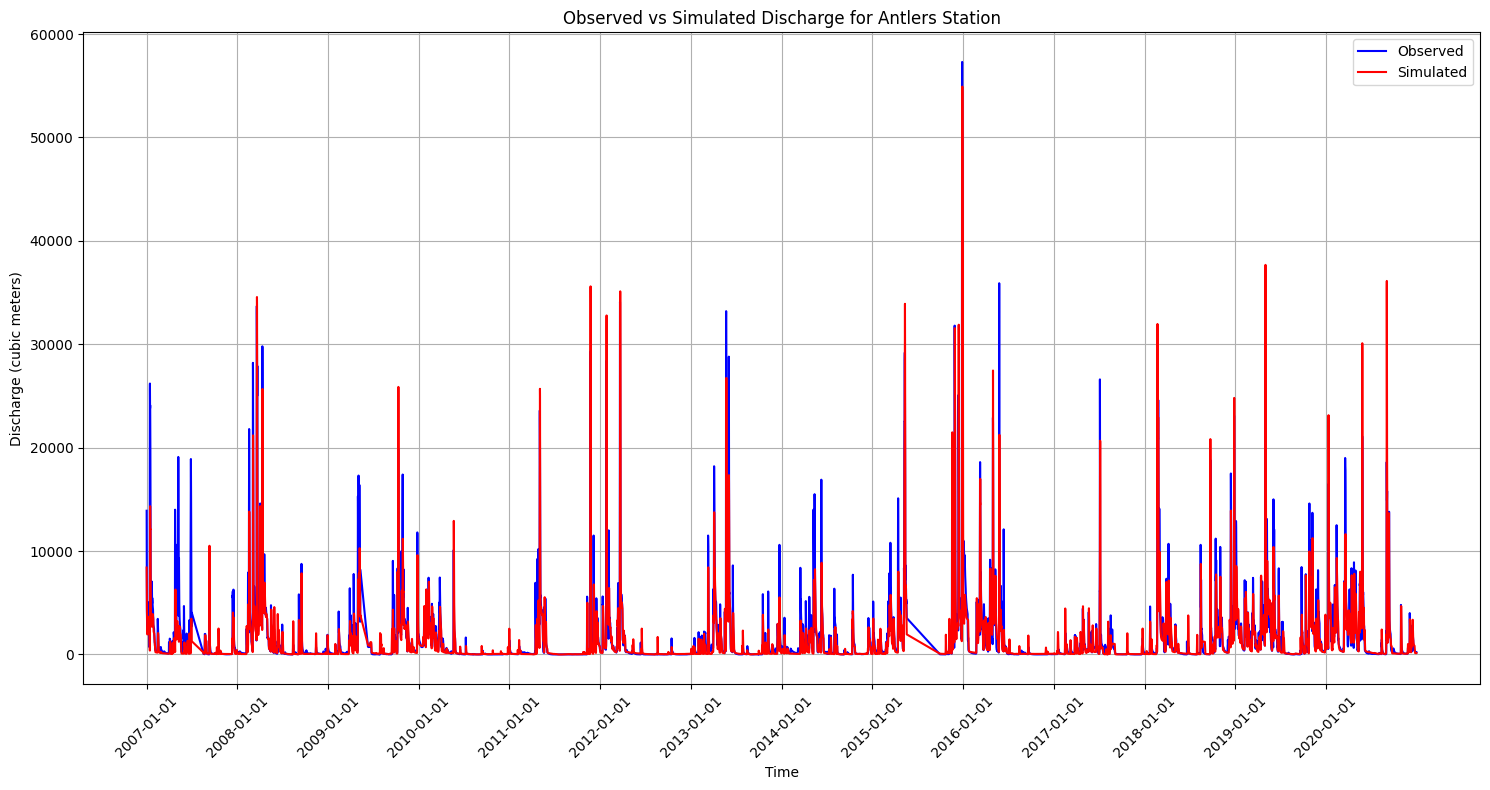

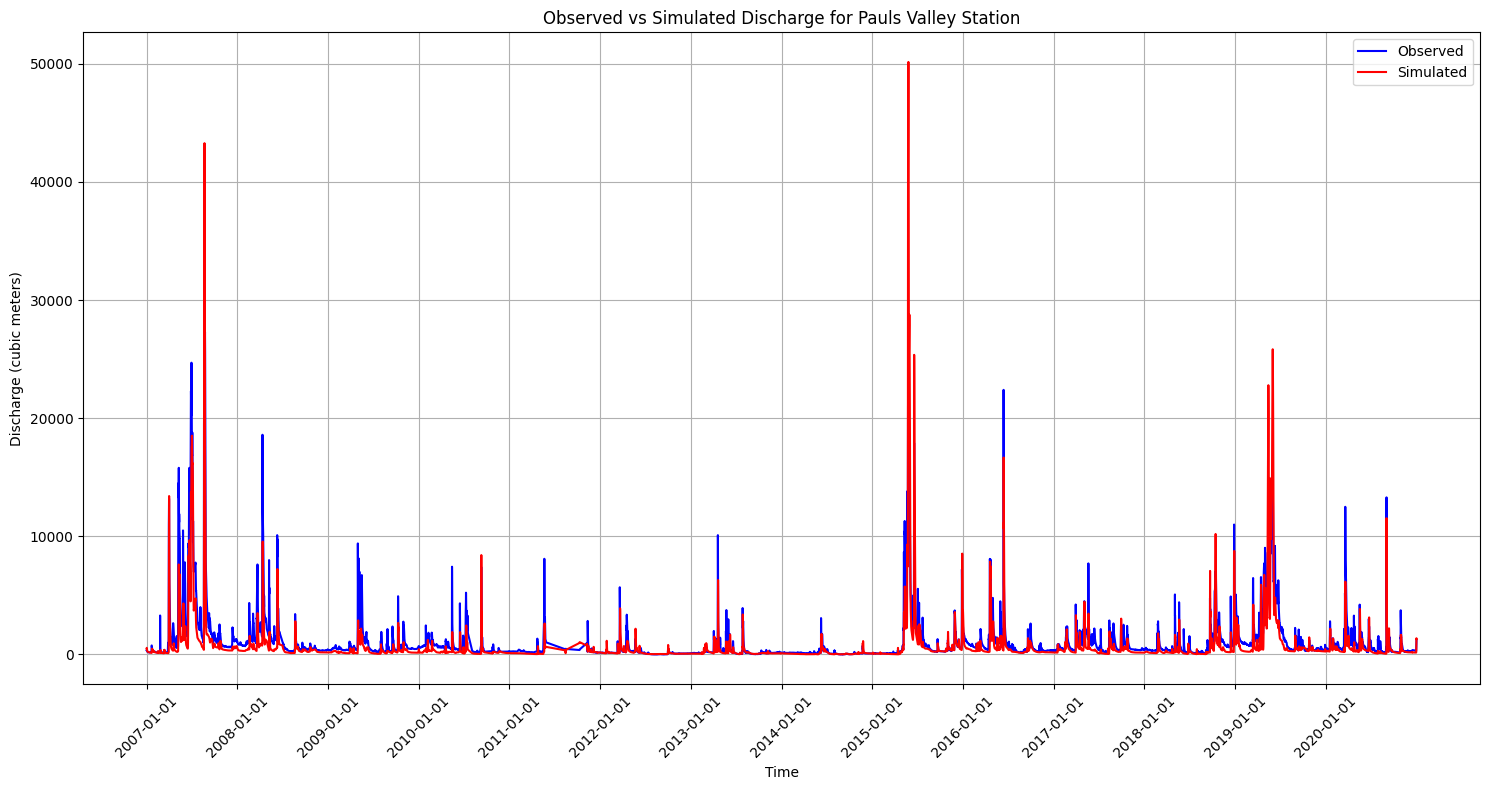

In [ ]:
from plot_utils import plot_observed_vs_simulated_time_series

# Plot observed vs simulated discharge time series for Antlers station
plot_observed_vs_simulated_time_series(df_anto_merged, df_anto_merged, 'Antlers')

# Plot observed vs simulated discharge time series for Pauls Valley station
plot_observed_vs_simulated_time_series(df_plvo_merged, df_plvo_merged, 'Pauls Valley')


In [ ]:

# Calculate NSE for Antlers station
nse_antlers = nse_utils.calculate_nse_for_station(df_anto_merged, df_anto_merged)

# Calculate NSE for Pauls Valley station
nse_pauls_valley = nse_utils.calculate_nse_for_station(df_plvo_merged, df_plvo_merged)

print("NSE for Antlers station:", nse_antlers)
print("NSE for Pauls Valley station:", nse_pauls_valley)


NSE for Antlers station: 0.724296028334011
NSE for Pauls Valley station: 0.6116674437568762


In [ ]:
df_anto_merged['datetime'] = pd.to_datetime(df_anto_merged['datetime'])
df_plvo_merged['datetime'] = pd.to_datetime(df_plvo_merged['datetime'])


In [ ]:
df_anto_merged.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
0,USGS,7336200,2007-01-01 06:00:00+00:00,UTC,13900.0,A:[91],8404
1,USGS,7336200,2007-01-01 12:00:00+00:00,UTC,10100.0,A:[91],7821
2,USGS,7336200,2007-01-01 18:00:00+00:00,UTC,6870.0,A:[91],7006
3,USGS,7336200,2007-01-02 00:00:00+00:00,UTC,5080.0,A:[91],6090
4,USGS,7336200,2007-01-02 06:00:00+00:00,UTC,4180.0,A:[91],5257


In [ ]:
train_start, train_end = '2007-01-01 06:00:00+00:00', '2015-12-31 18:00:00+00:00'
val_start, val_end = '2016-01-01 00:00:00+00:00', '2018-12-31 18:00:00+00:00'
test_start, test_end = '2019-01-01 00:00:00+00:00', '2020-12-31 12:00:00+00:00'


In [ ]:
train_start = pd.Timestamp(train_start)
train_end = pd.Timestamp(train_end)
val_start = pd.Timestamp(val_start)
val_end = pd.Timestamp(val_end)
test_start = pd.Timestamp(test_start)
test_end = pd.Timestamp(test_end)


In [ ]:
df_anto_train = df_anto_merged[(df_anto_merged['datetime'] >= train_start) & (df_anto_merged['datetime'] <= train_end)]
df_anto_val = df_anto_merged[(df_anto_merged['datetime'] >= val_start) & (df_anto_merged['datetime'] <= val_end)]
df_anto_test = df_anto_merged[(df_anto_merged['datetime'] >= test_start) & (df_anto_merged['datetime'] <= test_end)]


In [ ]:

# Verify lengths of each set
print("Training data length:", len(df_anto_train))
print("Validation data length:", len(df_anto_val))
print("Testing data length:", len(df_anto_test))


Training data length: 11848
Validation data length: 3877
Testing data length: 2742


In [ ]:
df_anto_train

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
0,USGS,7336200,2007-01-01 06:00:00+00:00,UTC,13900.0,A:[91],8404
1,USGS,7336200,2007-01-01 12:00:00+00:00,UTC,10100.0,A:[91],7821
2,USGS,7336200,2007-01-01 18:00:00+00:00,UTC,6870.0,A:[91],7006
3,USGS,7336200,2007-01-02 00:00:00+00:00,UTC,5080.0,A:[91],6090
4,USGS,7336200,2007-01-02 06:00:00+00:00,UTC,4180.0,A:[91],5257
...,...,...,...,...,...,...,...
11843,USGS,7336200,2015-12-30 18:00:00+00:00,UTC,45300.0,A,47024
11844,USGS,7336200,2015-12-31 00:00:00+00:00,UTC,41500.0,A,44605
11845,USGS,7336200,2015-12-31 06:00:00+00:00,UTC,37700.0,A,41891
11846,USGS,7336200,2015-12-31 12:00:00+00:00,UTC,30100.0,A,38950


In [ ]:
df_anto_val

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
11848,USGS,7336200,2016-01-01 00:00:00+00:00,UTC,9750.0,A,33221
11849,USGS,7336200,2016-01-01 06:00:00+00:00,UTC,9330.0,A,20053
11850,USGS,7336200,2016-01-01 12:00:00+00:00,UTC,9860.0,A,18136
11851,USGS,7336200,2016-01-01 18:00:00+00:00,UTC,10100.0,A,14319
11852,USGS,7336200,2016-01-02 00:00:00+00:00,UTC,10200.0,A,7396
...,...,...,...,...,...,...,...
15720,USGS,7336200,2018-12-30 12:00:00+00:00,UTC,3310.0,A,6764
15721,USGS,7336200,2018-12-30 18:00:00+00:00,UTC,2970.0,A,5984
15722,USGS,7336200,2018-12-31 00:00:00+00:00,UTC,2710.0,A,5187
15723,USGS,7336200,2018-12-31 12:00:00+00:00,UTC,2470.0,A,3721


In [ ]:
df_anto_test

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
15725,USGS,7336200,2019-01-01 00:00:00+00:00,UTC,4040.0,A,3396
15726,USGS,7336200,2019-01-01 06:00:00+00:00,UTC,4900.0,A,3879
15727,USGS,7336200,2019-01-01 12:00:00+00:00,UTC,5860.0,A,4301
15728,USGS,7336200,2019-01-01 18:00:00+00:00,UTC,6300.0,A,4617
15729,USGS,7336200,2019-01-02 00:00:00+00:00,UTC,5790.0,A,4949
...,...,...,...,...,...,...,...
18462,USGS,7336200,2020-12-30 12:00:00+00:00,UTC,191.0,A,119
18463,USGS,7336200,2020-12-30 18:00:00+00:00,UTC,201.0,A,118
18464,USGS,7336200,2020-12-31 00:00:00+00:00,UTC,201.0,A,118
18465,USGS,7336200,2020-12-31 06:00:00+00:00,UTC,199.0,A,117


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Extracting the streamflow values as the target variable
streamflow = df_anto_merged['Sim_Discharge'].values

# Filtering the data for the specified training and testing periods
df_anto_train = df_anto_merged[(df_anto_merged['datetime'] >= train_start) & (df_anto_merged['datetime'] <= train_end)]
df_anto_val = df_anto_merged[(df_anto_merged['datetime'] >= val_start) & (df_anto_merged['datetime'] <= val_end)]
df_anto_test = df_anto_merged[(df_anto_merged['datetime'] >= test_start) & (df_anto_merged['datetime'] <= test_end)]


# Extracting the streamflow values from the training and testing data
train_streamflow = df_anto_train['Sim_Discharge'].values
Val_streamflow = df_anto_val['Sim_Discharge'].values
test_streamflow = df_anto_test['Sim_Discharge'].values

# Normalizing the streamflow data (scaling to values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
train_streamflow = scaler.fit_transform(train_streamflow.reshape(-1, 1))
Val_streamflow = scaler.fit_transform(Val_streamflow.reshape(-1, 1))
test_streamflow = scaler.transform(test_streamflow.reshape(-1, 1))

In [ ]:
# Defining a function to prepare the dataset for LSTM
def prepare_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

#  Defining the number of time steps to consider (30 days because its a monthly data)
n_steps = 30

# Preparing the dataset for training
X_train, y_train = prepare_dataset(train_streamflow, n_steps)

# Preparing the dataset for validation test
X_val, y_val = prepare_dataset(Val_streamflow, n_steps)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


# Defining the LSTM model
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)



Epoch 1/10
370/370 [==============================] - 5s 10ms/step - loss: 0.0031
Epoch 2/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0018
Epoch 3/10
370/370 [==============================] - 5s 14ms/step - loss: 0.0015
Epoch 4/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0013
Epoch 5/10
370/370 [==============================] - 4s 10ms/step - loss: 0.0011
Epoch 6/10
370/370 [==============================] - 4s 11ms/step - loss: 0.0010
Epoch 7/10
370/370 [==============================] - 4s 12ms/step - loss: 8.7876e-04
Epoch 8/10
370/370 [==============================] - 5s 12ms/step - loss: 6.8509e-04
Epoch 9/10
370/370 [==============================] - 4s 12ms/step - loss: 5.8111e-04
Epoch 10/10
370/370 [==============================] - 5s 14ms/step - loss: 5.1739e-04


In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((11818, 30, 1), (11818, 1), (3847, 30, 1), (3847, 1))

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_val)

121/121 [==============================] - 1s 4ms/step


In [ ]:
# Inversing transform the predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_val = scaler.inverse_transform(y_val)


# Calculating Nash-Sutcliffe Efficiency (NSE) for evaluation
nse = 1 - (np.sum((y_val - y_pred) ** 2) / np.sum((y_val - np.mean(y_val)) ** 2))
print(f"Nash-Sutcliffe Efficiency (NSE): {nse}")

Nash-Sutcliffe Efficiency (NSE): 0.8247675393324472


In [ ]:
y_pred

array([[5098.923 ],
       [5167.7026],
       [5164.1006],
       ...,
       [3446.4106],
       [2847.0825],
       [2170.1938]], dtype=float32)

In [ ]:
# datetime values for  validation period
validation_dates = df_anto_val['datetime']


usgs_discharge = df_anto_val['USGS_Discharge']
sim_discharge = df_anto_val['Sim_Discharge']
lstm_predictions = model.predict(X_val)

# Inversing transform the LSTM predictions to the original scale
lstm_predictions = scaler.inverse_transform(lstm_predictions)

121/121 [==============================] - 0s 4ms/step


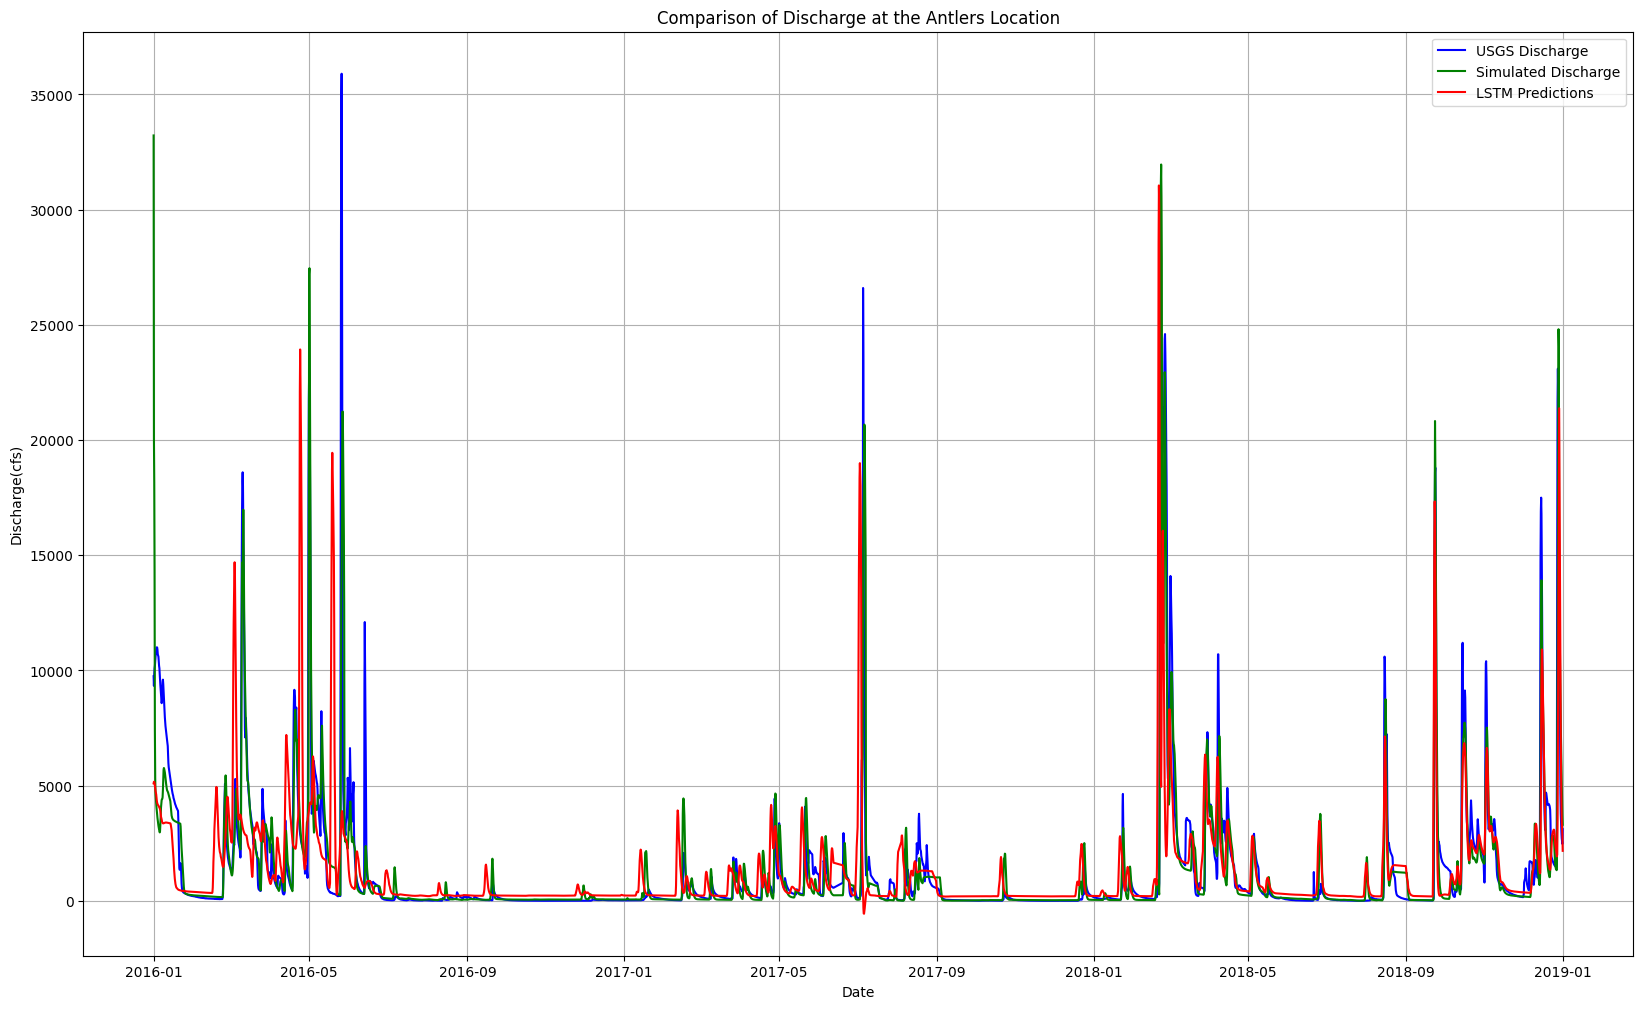

In [ ]:
import numpy as np
from scipy.interpolate import interp1d

# Interpolate LSTM predictions to match the length of validation_dates
interp_func = interp1d(np.arange(len(lstm_predictions)), lstm_predictions.flatten())
lstm_predictions_interp = interp_func(np.linspace(0, len(lstm_predictions) - 1, len(validation_dates)))

# Plotting
plt.figure(figsize=(20, 12))
plt.plot(validation_dates, usgs_discharge, label='USGS Discharge', color='blue')
plt.plot(validation_dates, sim_discharge, label='Simulated Discharge', color='green')
plt.plot(validation_dates, lstm_predictions_interp, label='LSTM Predictions', color='red')

plt.title('Comparison of Discharge at the Antlers Location')
plt.xlabel('Date')
plt.ylabel('Discharge(cfs)')
plt.legend()
plt.grid(True)
plt.show()


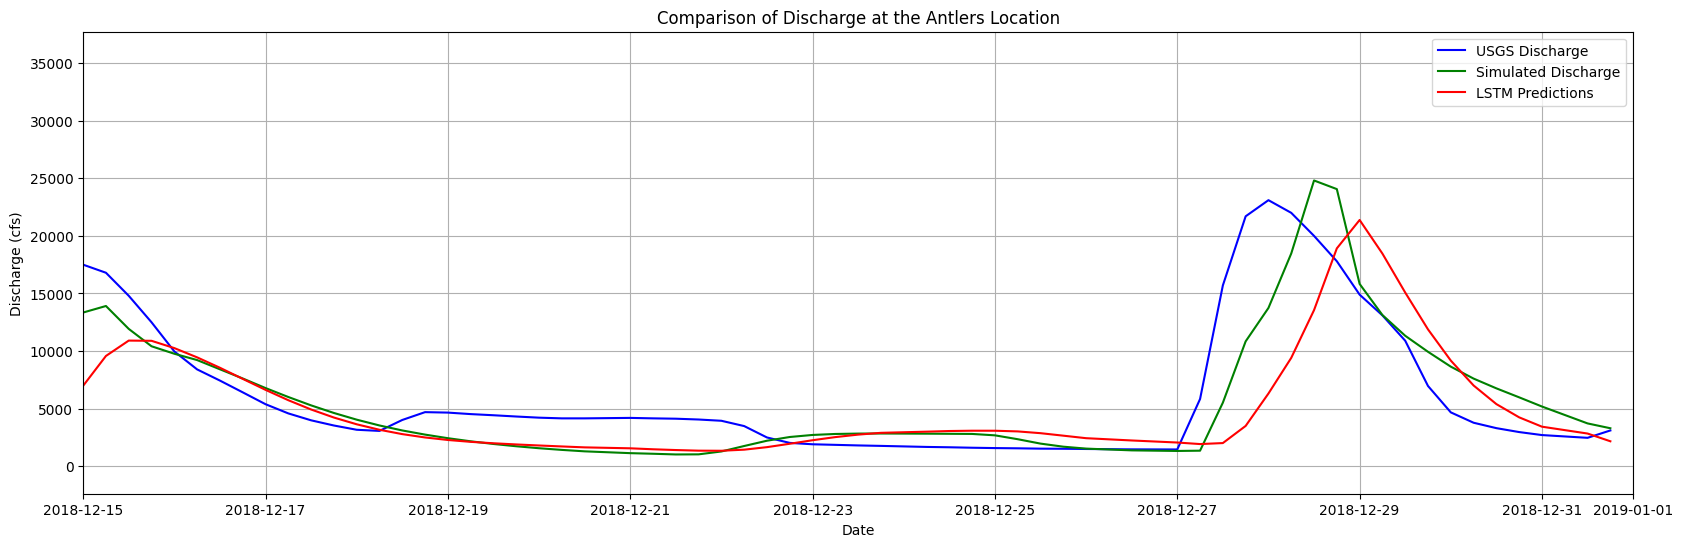

In [ ]:
#import matplotlib.pyplot as plt

# Find the minimum and maximum dates for the year 2018
min_date_2018 = pd.Timestamp('2018-12-15')
max_date_2018 = pd.Timestamp('2019-01-01')

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(validation_dates, usgs_discharge, label='USGS Discharge', color='blue')
plt.plot(validation_dates, sim_discharge, label='Simulated Discharge', color='green')
plt.plot(validation_dates, lstm_predictions_interp, label='LSTM Predictions', color='red')

plt.title('Comparison of Discharge at the Antlers Location')
plt.xlabel('Date')
plt.ylabel('Discharge (cfs)')
plt.legend()
plt.grid(True)

# Set x-axis limits to cover only the year 2018
plt.xlim(min_date_2018, max_date_2018)

plt.show()
